In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
test= pd.read_json("C:/Users/SHAHID/Desktop/whats cooking/test.json/test.json")
train= pd.read_json("C:/Users/SHAHID/Desktop/whats cooking/train.json/train.json")


In [21]:
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [22]:
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [23]:
train.shape

(39774, 3)

In [24]:
train.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [15]:
test.shape

(9944, 2)

In [16]:
test.describe()

,id
count,9944.000000
mean,24894.350362
std,14322.958061
min,5.000000
25%,12541.000000
50%,24731.500000
75%,37113.250000
max,49715.000000


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9944 non-null   int64 
 1   ingredients  9944 non-null   object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


In [18]:
test.isnull().sum()

id             0
ingredients    0
dtype: int64

In [26]:
train.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

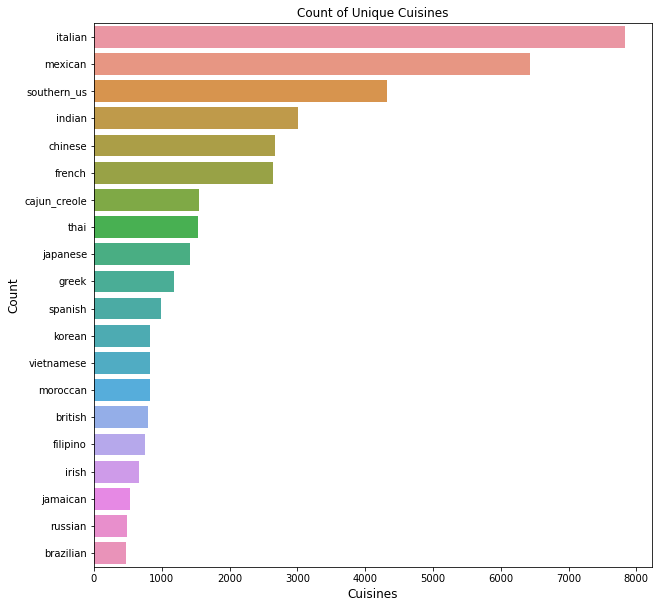

In [28]:
#Finding count of unique cuisines in train dataframe
count_cuisine = train['cuisine'].value_counts(sort=True)
plt.figure(figsize=(10,10))
sns.barplot(y = count_cuisine.index, x = count_cuisine.values)
plt.title('Count of Unique Cuisines')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cuisines', fontsize=12)
plt.show()

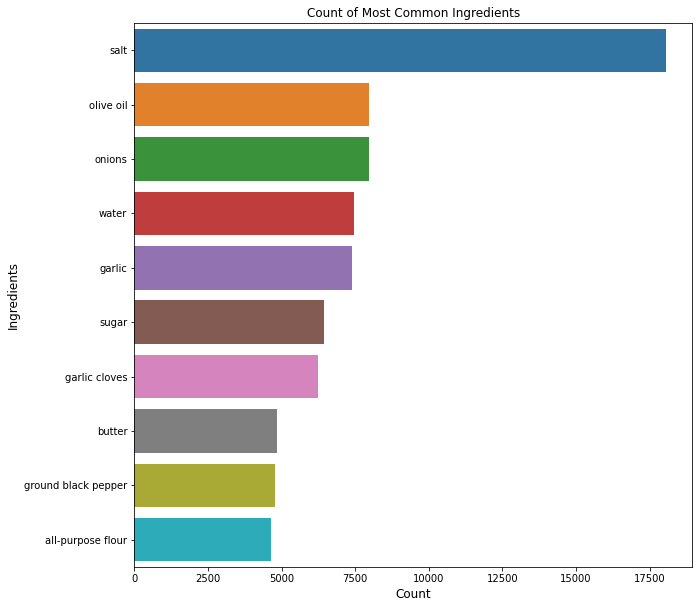

In [29]:
#Finding count of most common ingredients in train dataframe
count_ingredients = []
for x in train['ingredients']:
    for y in x:
        count_ingredients.append(y)
count_ingredients = pd.Series(count_ingredients)
c_ingredients = count_ingredients.value_counts(sort=True).head(10)
plt.figure(figsize=(10,10))
sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
plt.title('Count of Most Common Ingredients')
plt.ylabel('Ingredients', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

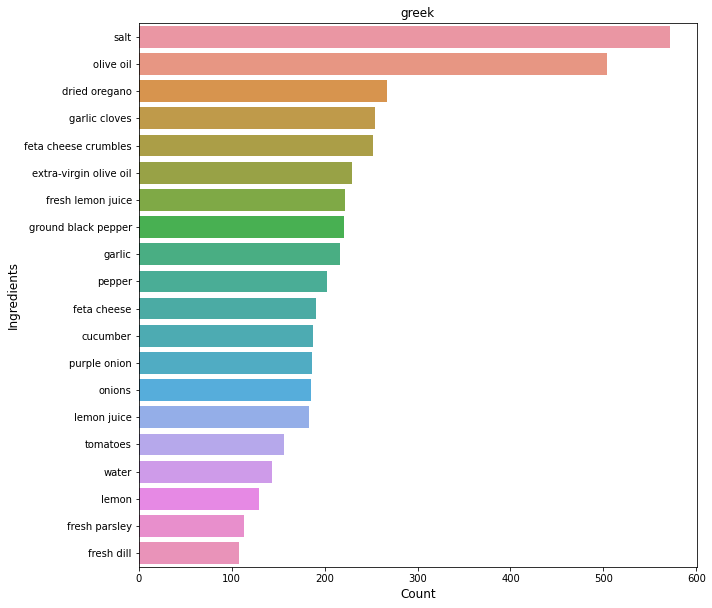

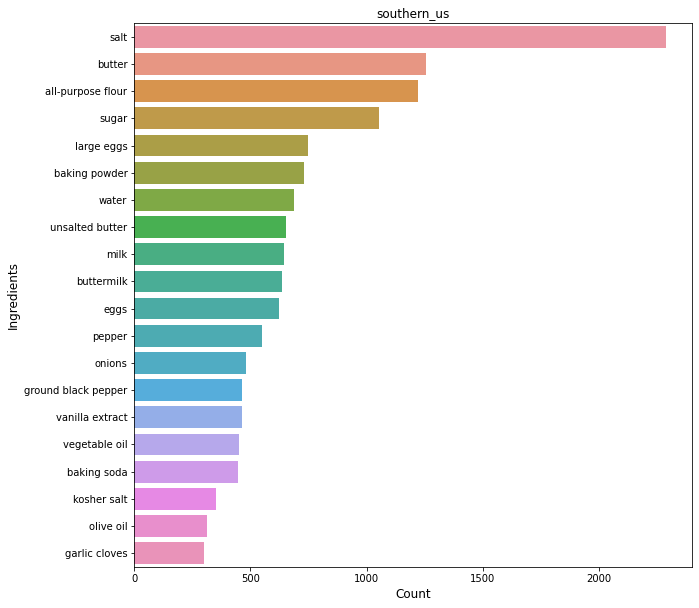

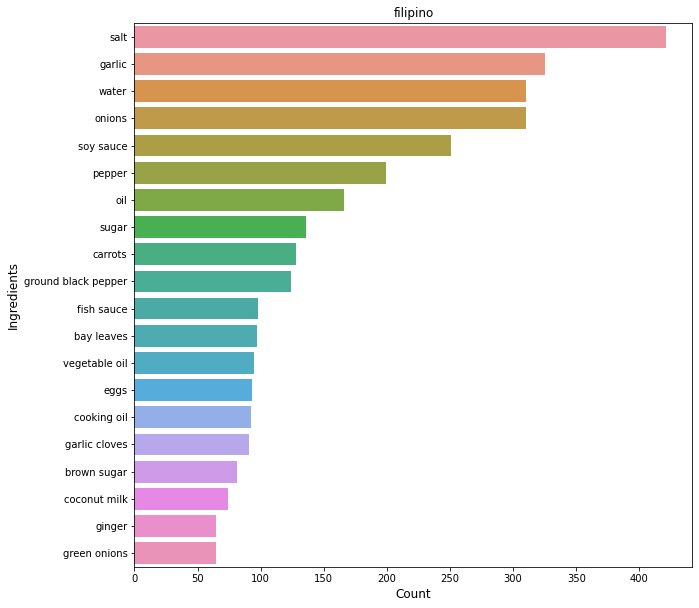

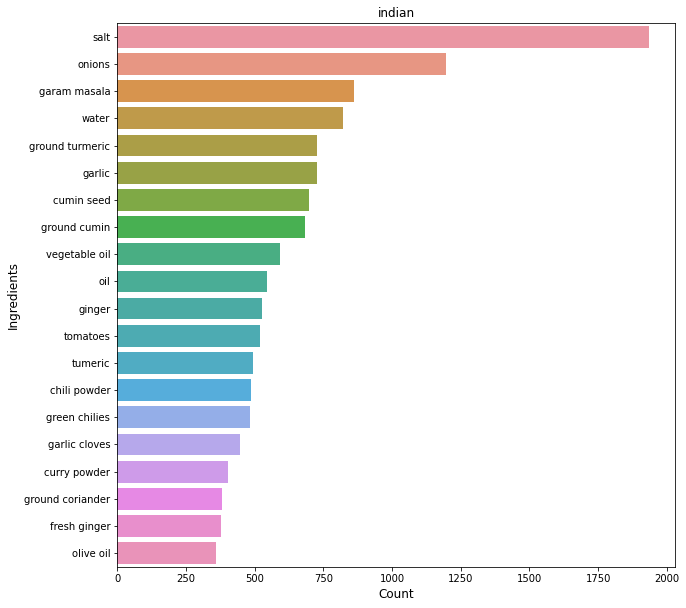

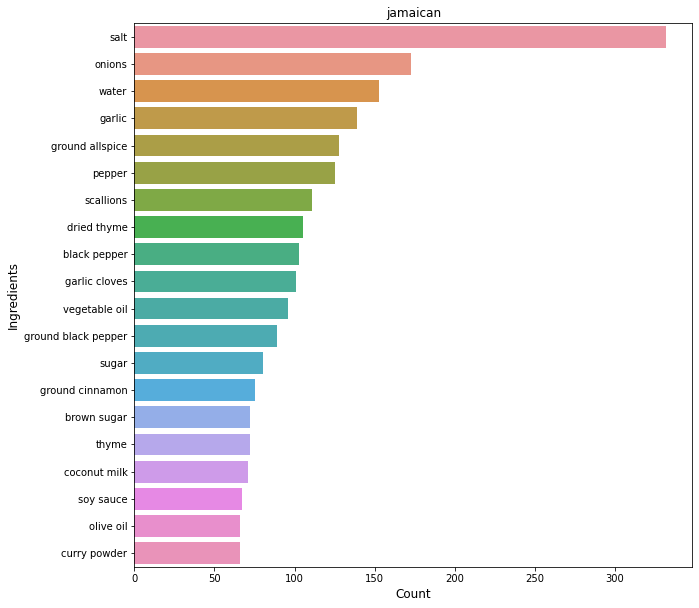

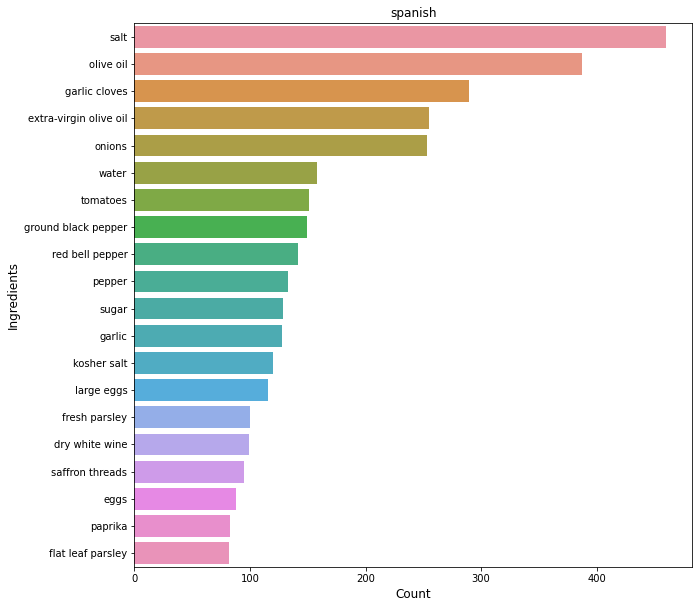

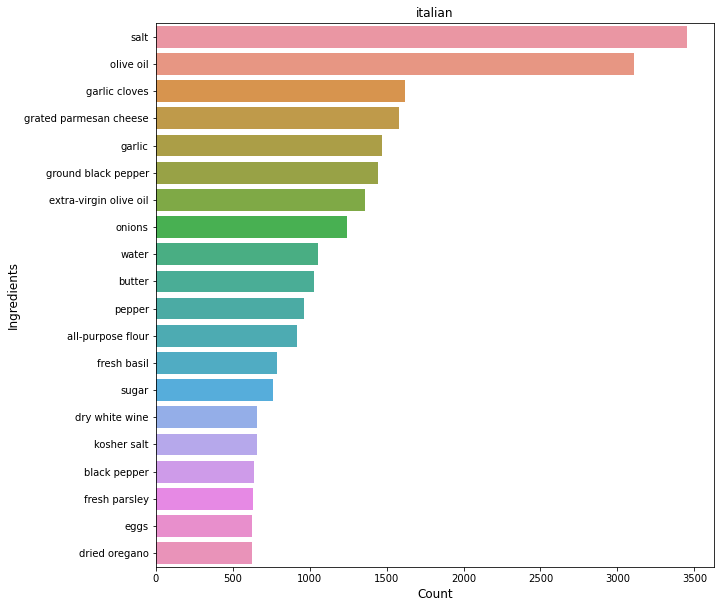

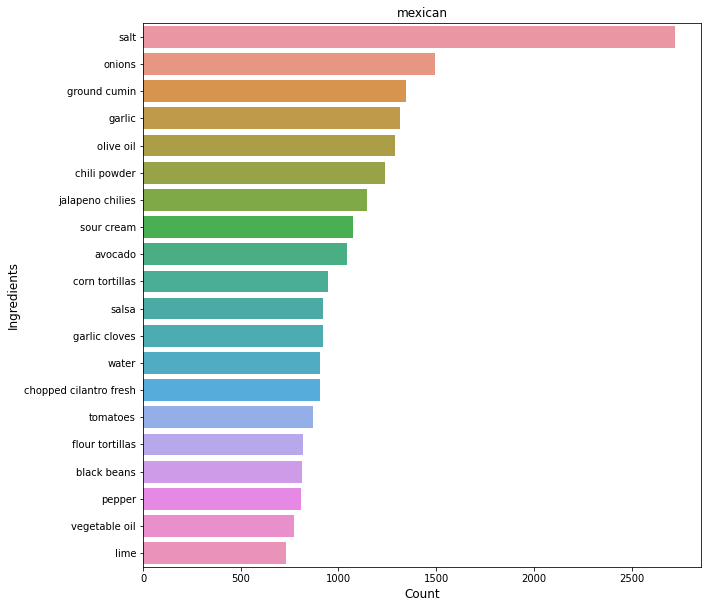

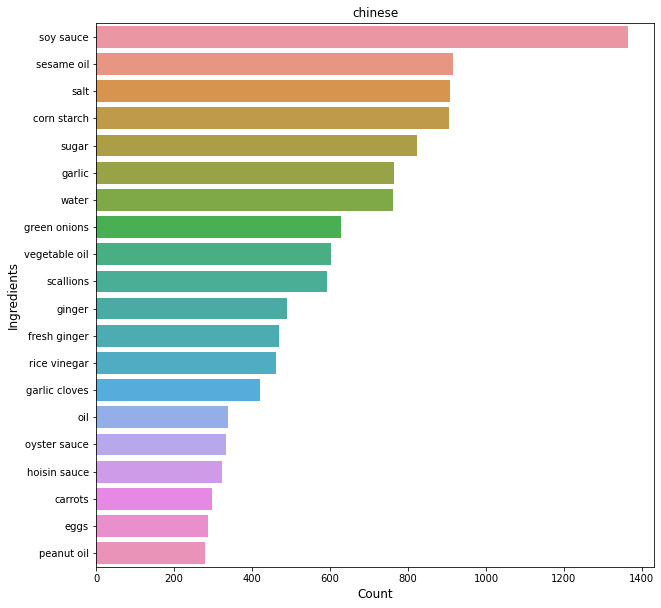

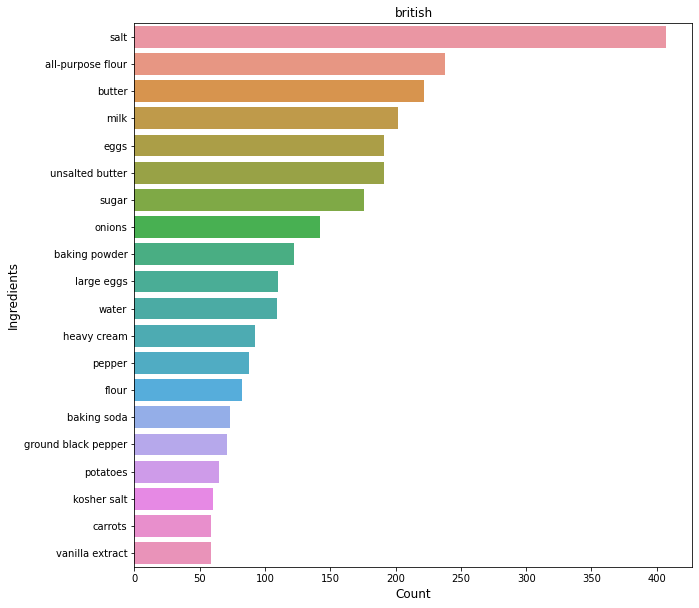

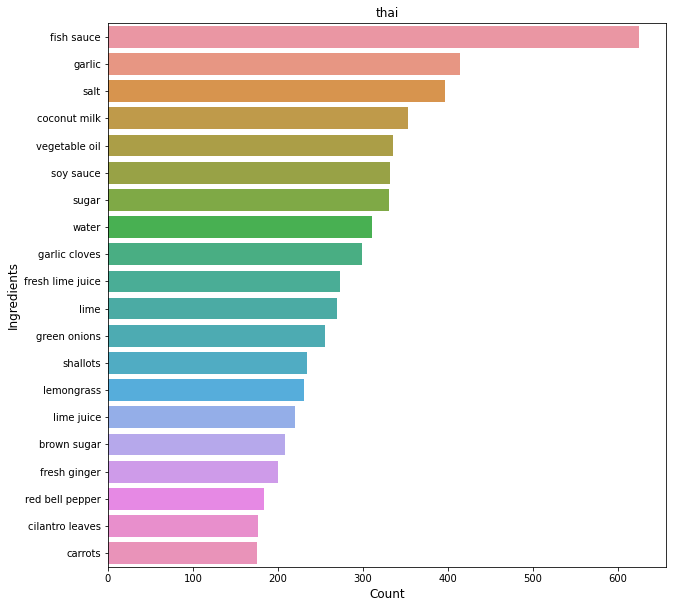

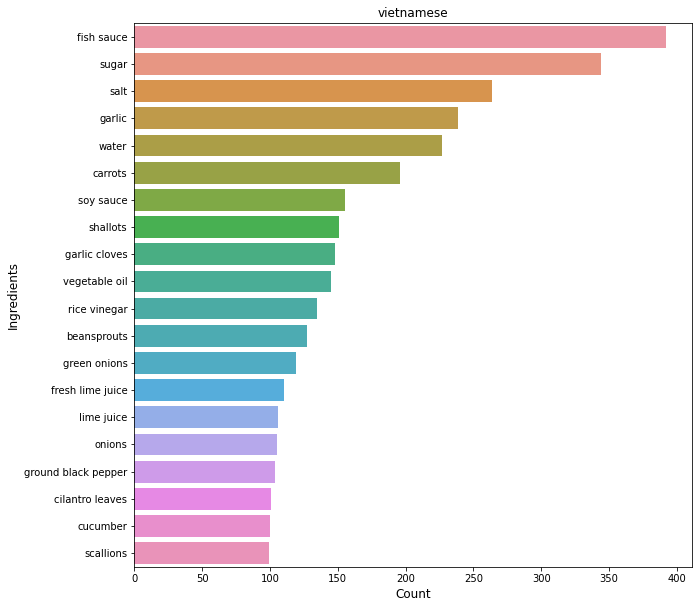

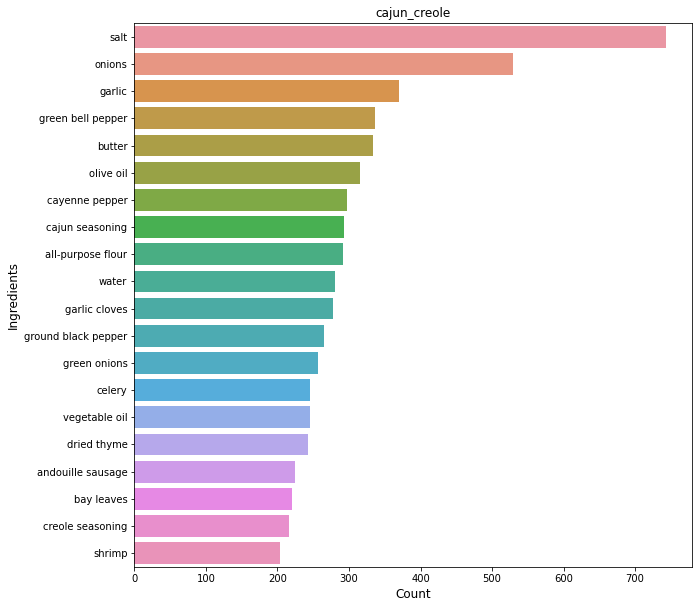

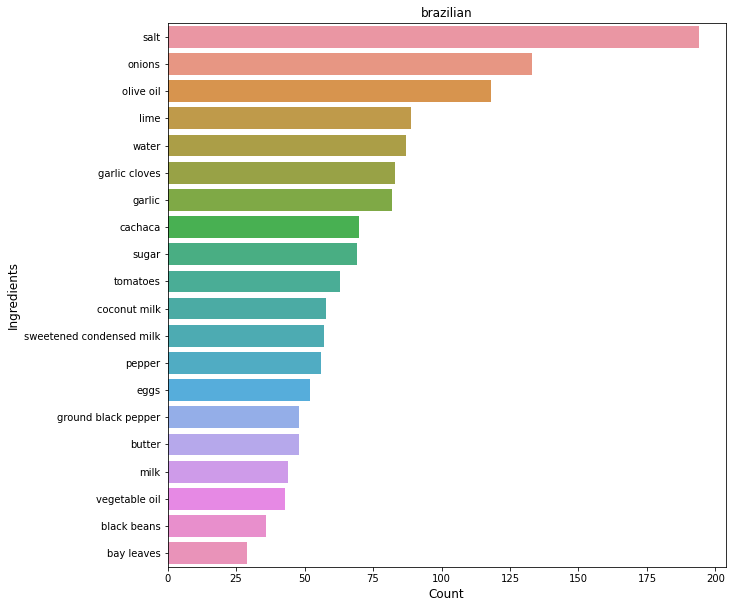

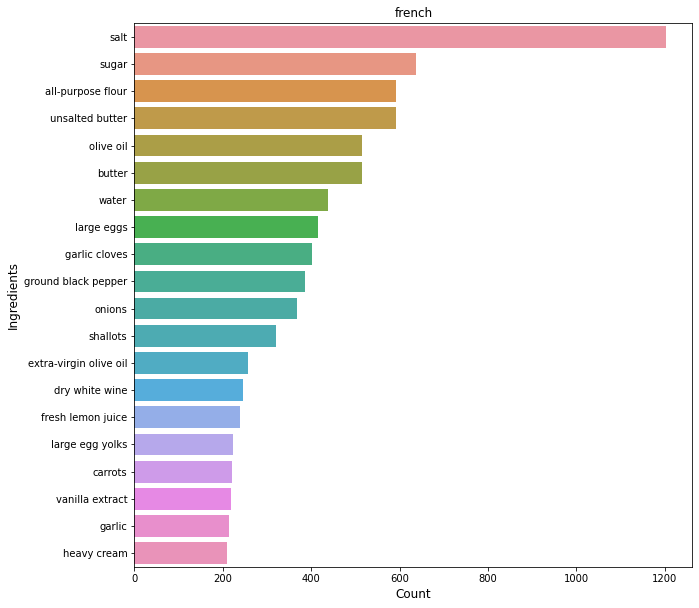

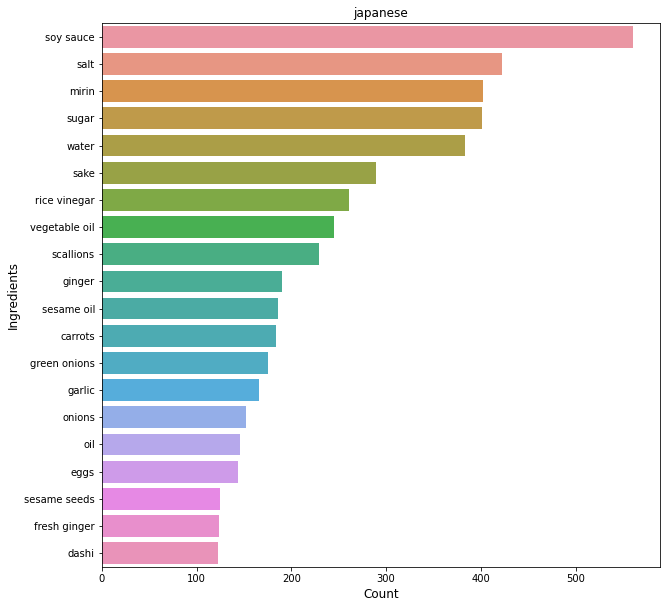

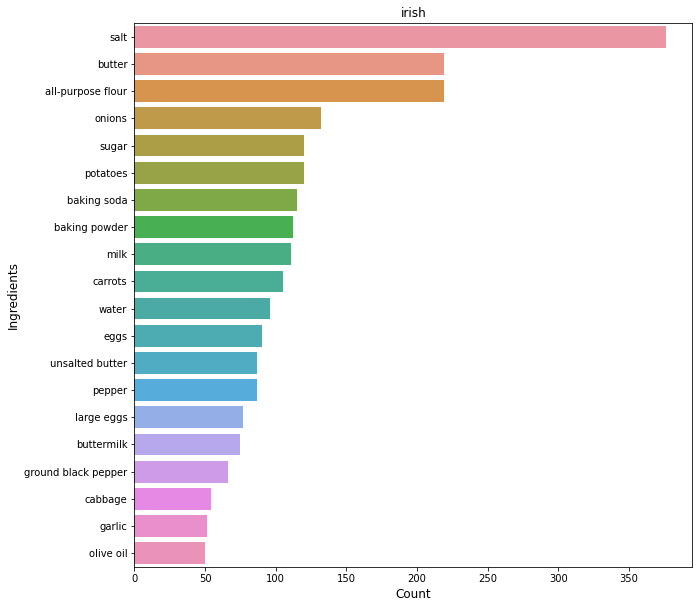

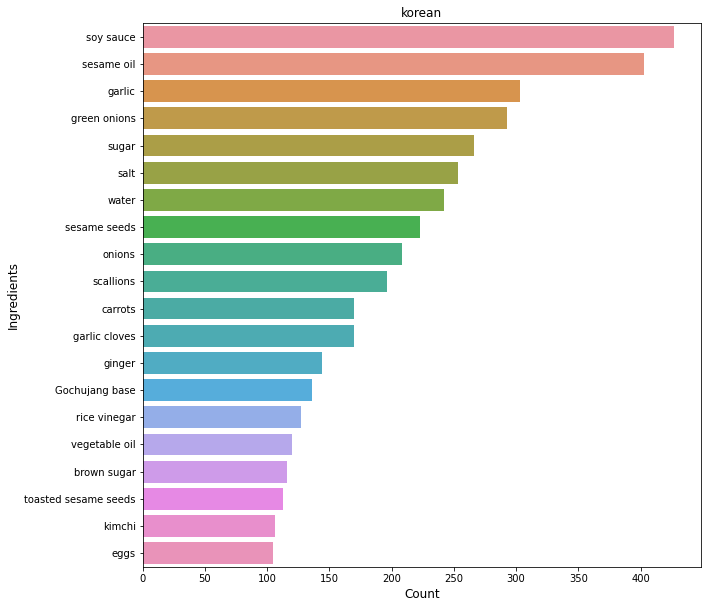

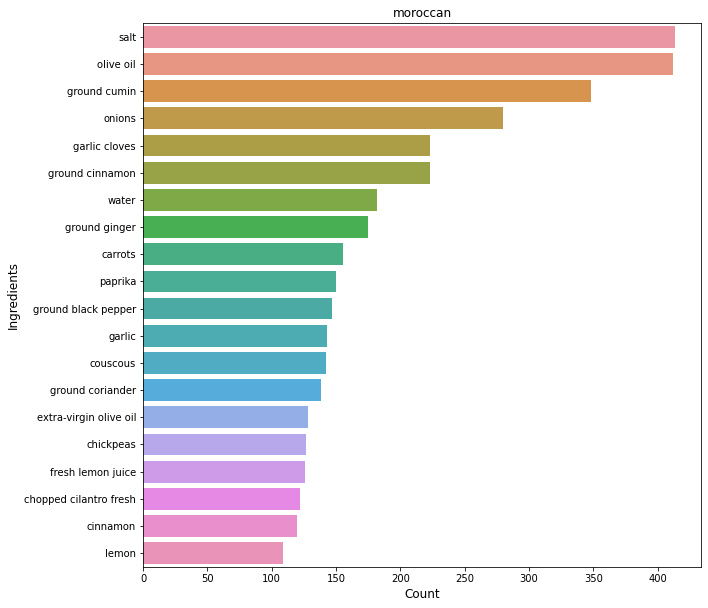

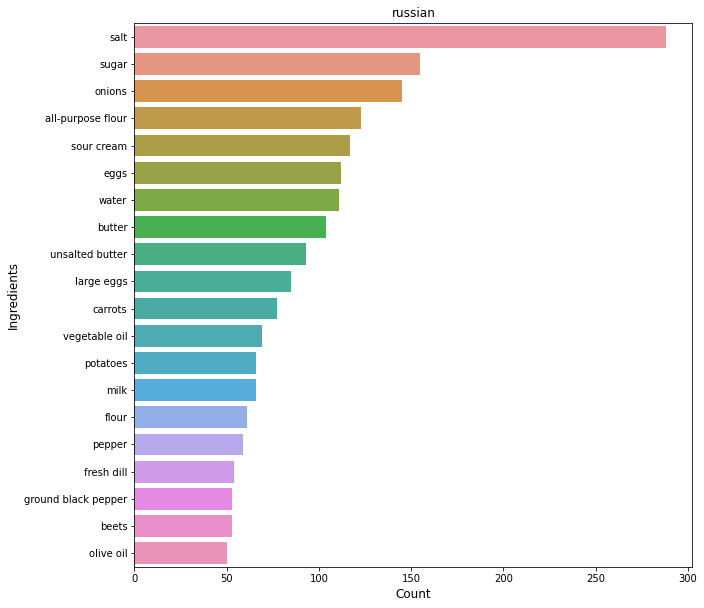

In [30]:
#Top 20 ingredients in all cuisines
cuisines = train['cuisine'].unique()
for i in cuisines:
  ingredients=[]
  for j in train[train['cuisine']==i]['ingredients']:
    for k in j:
      ingredients.append(k)
  ingredients = pd.Series(ingredients)
  c_ingredients = ingredients.value_counts(sort=True).head(20)
  plt.figure(figsize=(10,10))
  sns.barplot(y = c_ingredients.index, x = c_ingredients.values)
  plt.title(i)
  plt.ylabel('Ingredients', fontsize=12)
  plt.xlabel('Count', fontsize=12)
  plt.show()


In [58]:
x

['green chile',
 'jalapeno chilies',
 'onions',
 'ground black pepper',
 'salt',
 'chopped cilantro fresh',
 'green bell pepper',
 'garlic',
 'white sugar',
 'roma tomatoes',
 'celery',
 'dried oregano']

In [59]:
y

'dried oregano'

In [80]:
cuisine_counts = train['cuisine'].value_counts()
cuisine_counts

cuisine
italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: count, dtype: int64

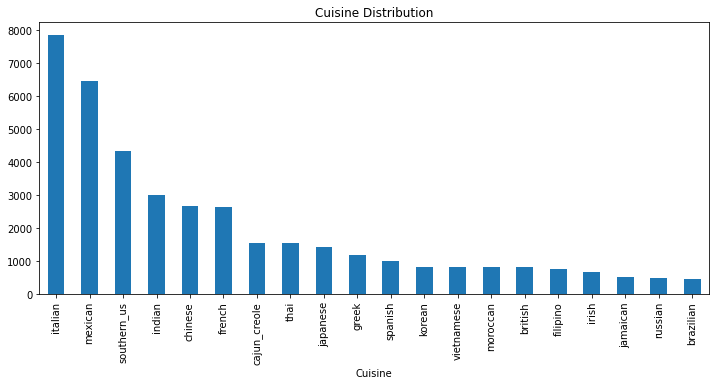

In [81]:
ax = cuisine_counts.plot(kind='bar',
                figsize=(12, 5),
                 title='Cuisine Distribution')
ax.set_xticks(range(len(cuisine_counts)))
ax.set_xlabel("Cuisine")
ax.set_xticklabels(cuisine_counts.index);

In [83]:
ingredients_count = dict()
for ingredients in train['ingredients']:
    for ingredient in ingredients:
        if ingredient in ingredients_count:
            ingredients_count[ingredient] = ingredients_count[ingredient] + 1
        else:
            ingredients_count[ingredient] = 1

ingredients_count = pd.DataFrame(ingredients_count.items())
ingredients_count = ingredients_count.sort_values(by=[1], ascending=False)
ingredients_count.shape

(6714, 2)

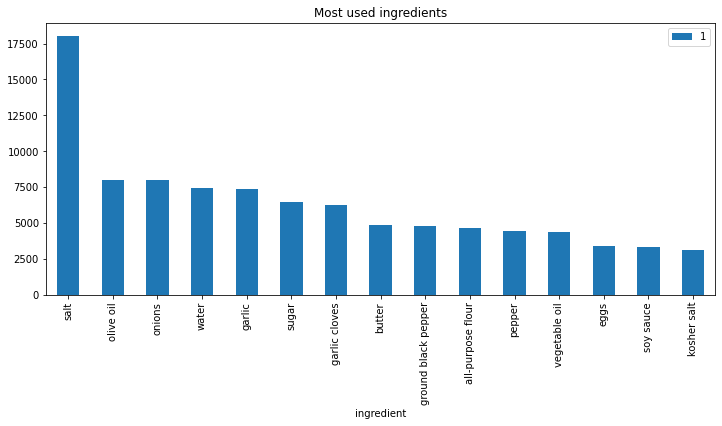

In [84]:
ax = ingredients_count[:15].plot(kind='bar',
                figsize=(12, 5),
                title='Most used ingredients')
ax.set_xticks(range(len(ingredients_count[:15])))
ax.set_xlabel("ingredient")
ax.set_xticklabels(ingredients_count[0][:15]);

In [85]:
grouped_by_cuisines = train.groupby('cuisine')
grouped_by_cuisines.get_group('italian').head()

,id,cuisine,ingredients
7,3735,italian,"[sugar, pistachio nuts, white almond bark, flo..."
9,12734,italian,"[chopped tomatoes, fresh basil, garlic, extra-..."
10,5875,italian,"[pimentos, sweet pepper, dried oregano, olive ..."
12,2698,italian,"[Italian parsley leaves, walnuts, hot red pepp..."
14,31908,italian,"[fresh parmesan cheese, butter, all-purpose fl..."


In [88]:
italian_ingredients = dict()
for ingredients in grouped_by_cuisines.get_group('italian').ingredients:
    for ingredient in ingredients:
        if ingredient in italian_ingredients:
            italian_ingredients[ingredient] = italian_ingredients[ingredient] + 1
        else:
            italian_ingredients[ingredient] = 1

italian_ingredients = pd.DataFrame(italian_ingredients.items())
italian_ingredients = italian_ingredients.sort_values(by=[1], ascending=False)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [91]:
vectorizer = TfidfVectorizer()

y = train.cuisine
X = train.ingredients.str.join(' ')
X = vectorizer.fit_transform(X)

In [92]:
X_test_data = test.ingredients.str.join(' ')
X_test_data = vectorizer.transform(X_test_data)

In [93]:
split = train_test_split(X, y)
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=0
)

In [94]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
SVM_model = clf.fit(x_train, y_train)
pred = SVM_model.predict(x_test)

print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))


LinearSVC accuracy :  0.7937146448774356


In [95]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_model = gnb.fit(x_train.toarray(), y_train)
pred = gnb_model.predict(x_test.toarray())
print("GaussianNB accuracy : ",accuracy_score(y_test, pred, normalize = True))


GaussianNB accuracy :  0.25204274041483343


In [96]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

pred = neigh.predict(x_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.716781898177247


In [97]:
test_data_prediction = SVM_model.predict(X_test_data)

In [98]:
submission_df = pd.DataFrame(columns=['id', 'cuisine'])
submission_df['id'] = test ['id']
submission_df['cuisine'] = test_data_prediction 
submission_df[['id' , 'cuisine' ]].to_csv("whats-cooking.csv", index=False)